In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout

-----

In [3]:
df = pd.read_csv('merge_data/normalized_dataset_final.csv')

In [4]:
df.sample(5)

,closest_LARGE_airport_distance,closest_MEDIUM_airport_distance,closest_SMALL_airport_distance,closest_metro_distance,closest_metro_pop,closest_metro_m4,closest_metro_m6,population,meteor_sighting,id
31016,0.002426,0.001254,0.001665,0.004245,1.000000,1.000000,1.0,0.234455,0.0,49590
15579,0.012057,0.007172,0.004733,0.029299,0.117374,0.444444,0.4,0.022246,0.0,24911
24431,0.002897,0.003469,0.001027,0.003525,0.283553,0.333333,0.3,0.674320,0.0,39410
37897,0.001314,0.002113,0.000176,0.000263,0.000488,0.111111,0.0,0.150943,0.0,60246
13218,0.004450,0.002402,0.000327,0.006152,0.263543,0.444444,0.4,0.224301,0.0,20956


In [5]:
list(df.columns.values)

['closest_LARGE_airport_distance',
 'closest_MEDIUM_airport_distance',
 'closest_SMALL_airport_distance',
 'closest_metro_distance',
 'closest_metro_pop',
 'closest_metro_m4',
 'closest_metro_m6',
 'population',
 'meteor_sighting',
 'id']

In [6]:
ftrs = ['closest_LARGE_airport_distance', 'closest_MEDIUM_airport_distance', 'closest_SMALL_airport_distance', 'closest_metro_distance', 'closest_metro_pop', 'closest_metro_m4', 'closest_metro_m6', 'population', 'meteor_sighting']

In [7]:
df[ftrs].sample(5)

,closest_LARGE_airport_distance,closest_MEDIUM_airport_distance,closest_SMALL_airport_distance,closest_metro_distance,closest_metro_pop,closest_metro_m4,closest_metro_m6,population,meteor_sighting
23278,0.002556,0.002970,0.000918,0.001870,0.126891,0.444444,0.4,0.079917,0.0
19751,0.000222,0.004134,0.000553,0.000560,0.070766,0.222222,0.1,0.172375,0.0
37412,0.004009,0.000526,0.001917,0.010970,0.045632,0.111111,0.0,0.254456,0.0
37532,0.000826,0.008646,0.000797,0.004918,0.281113,0.666667,0.6,1.000000,1.0
2928,0.003099,0.002513,0.000888,0.002546,0.160078,0.222222,0.2,0.156514,0.0


In [8]:
df.shape

(38439, 21)

In [9]:
cs = cosine_similarity(df[ftrs])

In [10]:
cs.shape

(38439, 38439)

In [ ]:
np.save('cs_np', cs)

In [12]:
cs_df = pd.DataFrame(cs)

In [ ]:
# cs_df.to_pickle('data/pickle_files/cs_df.pkl')
cs_df = pd.read_pickle('data/pickle_files/cs_df.pkl')

In [17]:
cs_df.head()

,0,1,2,3,4,5,6,7,8,9,...,38429,38430,38431,38432,38433,38434,38435,38436,38437,38438
0,1.000000,0.926565,0.993863,0.983793,0.993863,0.982301,0.979641,0.976747,0.993863,0.999725,...,0.986838,0.958556,0.809450,0.928317,0.878694,0.966989,0.985384,0.984822,0.986185,0.960721
1,0.926565,1.000000,0.962485,0.978992,0.962485,0.839711,0.832188,0.985661,0.962485,0.935137,...,0.975195,0.995327,0.970870,0.999989,0.993729,0.991824,0.977095,0.847217,0.976071,0.994554
2,0.993863,0.962485,1.000000,0.997590,1.000000,0.955554,0.951422,0.994468,1.000000,0.996186,...,0.998670,0.984188,0.869435,0.963746,0.926108,0.989241,0.998180,0.959579,0.998456,0.985523
3,0.983793,0.978992,0.997590,1.000000,0.997590,0.932795,0.927767,0.999360,0.997590,0.987730,...,0.999841,0.994106,0.901619,0.979936,0.950052,0.997008,0.999959,0.937739,0.999904,0.994911
4,0.993863,0.962485,1.000000,0.997590,1.000000,0.955554,0.951422,0.994468,1.000000,0.996186,...,0.998670,0.984188,0.869435,0.963746,0.926108,0.989241,0.998180,0.959579,0.998456,0.985523


In [19]:
cs_df.columns

RangeIndex(start=0, stop=38439, step=1)

In [24]:
len([str(i) for i in df['id'].tolist()])

38439

In [25]:
cs_df['id'] = df['id']

In [26]:
cs_df.head()

,0,1,2,3,4,5,6,7,8,9,...,38430,38431,38432,38433,38434,38435,38436,38437,38438,id
0,1.000000,0.926565,0.993863,0.983793,0.993863,0.982301,0.979641,0.976747,0.993863,0.999725,...,0.958556,0.809450,0.928317,0.878694,0.966989,0.985384,0.984822,0.986185,0.960721,0
1,0.926565,1.000000,0.962485,0.978992,0.962485,0.839711,0.832188,0.985661,0.962485,0.935137,...,0.995327,0.970870,0.999989,0.993729,0.991824,0.977095,0.847217,0.976071,0.994554,1
2,0.993863,0.962485,1.000000,0.997590,1.000000,0.955554,0.951422,0.994468,1.000000,0.996186,...,0.984188,0.869435,0.963746,0.926108,0.989241,0.998180,0.959579,0.998456,0.985523,2
3,0.983793,0.978992,0.997590,1.000000,0.997590,0.932795,0.927767,0.999360,0.997590,0.987730,...,0.994106,0.901619,0.979936,0.950052,0.997008,0.999959,0.937739,0.999904,0.994911,3
4,0.993863,0.962485,1.000000,0.997590,1.000000,0.955554,0.951422,0.994468,1.000000,0.996186,...,0.984188,0.869435,0.963746,0.926108,0.989241,0.998180,0.959579,0.998456,0.985523,4


In [ ]:
cs_df.drop(['id'], axis=1)

In [22]:
cosine_similarity(df[ftrs].sample(5))

array([[ 1.        ,  0.7293783 ,  0.76477067,  0.76811401,  0.81718968],
       [ 0.7293783 ,  1.        ,  0.97621941,  0.95976151,  0.50827145],
       [ 0.76477067,  0.97621941,  1.        ,  0.90829266,  0.47972864],
       [ 0.76811401,  0.95976151,  0.90829266,  1.        ,  0.52660279],
       [ 0.81718968,  0.50827145,  0.47972864,  0.52660279,  1.        ]])

In [38]:
a = cosine_similarity(df[ftrs].head(10))

In [39]:
a

array([[ 1.        ,  0.96380275,  0.94938845,  0.94428189,  0.94855711,
         0.91867571,  0.88627418,  0.94735306,  0.94884437,  0.9554522 ],
       [ 0.96380275,  1.        ,  0.93894433,  0.92296898,  0.93930523,
         0.8715627 ,  0.83196015,  0.95386134,  0.93927758,  0.92945223],
       [ 0.94938845,  0.93894433,  1.        ,  0.94611032,  0.99959834,
         0.89732549,  0.82524214,  0.99673022,  0.99977893,  0.99733241],
       [ 0.94428189,  0.92296898,  0.94611032,  1.        ,  0.94612839,
         0.98844702,  0.70009171,  0.95585409,  0.94619196,  0.95614003],
       [ 0.94855711,  0.93930523,  0.99959834,  0.94612839,  1.        ,
         0.8961565 ,  0.82559951,  0.99704493,  0.99997282,  0.99755104],
       [ 0.91867571,  0.8715627 ,  0.89732549,  0.98844702,  0.8961565 ,
         1.        ,  0.64666031,  0.90498152,  0.89651976,  0.91519892],
       [ 0.88627418,  0.83196015,  0.82524214,  0.70009171,  0.82559951,
         0.64666031,  1.        ,  0.8009964 

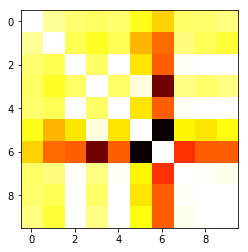

In [40]:
plt.imshow(a, cmap='hot', interpolation='nearest')

In [16]:
plt.show()

In [124]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

(150, 2)


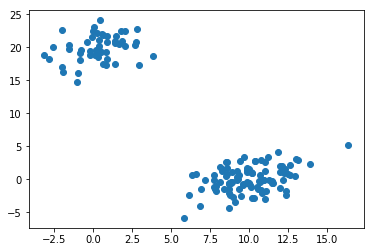

In [11]:
np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
print X.shape  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

In [7]:
X.shape

(150, 2)

In [151]:
df_sample = df.sample(1000)

In [152]:
# df_sample

In [161]:
# df_sample.to_pickle('sample.pkl')

In [154]:
a = cosine_similarity(df_sample[ftrs])

In [155]:
# a

In [156]:
Z = linkage(a, 'ward')
# Z = linkage(a)

In [157]:
Z.shape

(999, 4)

In [158]:
fig = plt.figure()

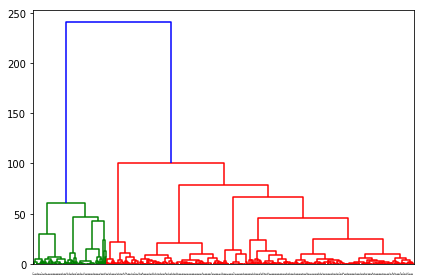

In [160]:
dn = dendrogram(Z)
plt.tight_layout()
plt.setp(plt.gca().get_xticklabels(), fontsize=0.75, rotation='vertical')
plt.savefig('scipy-dendrogram.svg')

In [85]:
type(dn)

dict

In [84]:
plt.show()

In [18]:
dn.keys()

['ivl', 'dcoord', 'leaves', 'color_list', 'icoord']